In [11]:
import geopandas as gpd
import rioxarray as rio
import numpy as np
import rasterio

##### DEM downloaded from: https://www.sciencebase.gov/catalog/item/5d140b8ae4b0941bde59934a

In [6]:
inputData = 'kernelPCA_clip'
n_clusters = 7
clusters = rio.open_rasterio('Rasters/kmenas_'+inputData+'_'+str(n_clusters)+'.tif')
dem      = rio.open_rasterio('Rasters/SuisunMarsh_2018_LEAN_DEM_1m_mm_USGS.tif')

In [3]:
# check the projection
print(clusters.rio.crs)
print(dem.rio.crs)

EPSG:32610
EPSG:26910


In [7]:
# if proyections don match, reproject
if clusters.rio.crs != dem.rio.crs:
    dem.rio.write_crs(clusters.rio.crs, inplace=True)

In [8]:
# check the projection
print(clusters.rio.crs)
print(dem.rio.crs)

EPSG:32610
EPSG:32610


In [12]:
def mask_water(prediction):
    import geopandas as gpd
    # load the shapefile
    shp = gpd.read_file('SHP/Suisun_mask.shp')
    # get geometry
    geometry = shp.geometry
    # clip the raster. astype(float) is necessary to store NaN values
    return prediction.astype(float).rio.clip(geometry, crs=shp.crs, drop=False)

dem = mask_water(dem)
dem

<xarray.DataArray (band: 1, y: 2207, x: 2522)>
array([[[-3.39999995e+38, -3.39999995e+38, -3.39999995e+38, ...,
         -3.39999995e+38, -3.39999995e+38, -3.39999995e+38],
        [-3.39999995e+38, -3.39999995e+38, -3.39999995e+38, ...,
         -3.39999995e+38, -3.39999995e+38, -3.39999995e+38],
        [-3.39999995e+38, -3.39999995e+38, -3.39999995e+38, ...,
         -3.39999995e+38, -3.39999995e+38, -3.39999995e+38],
        ...,
        [-3.39999995e+38, -3.39999995e+38, -3.39999995e+38, ...,
         -3.39999995e+38, -3.39999995e+38, -3.39999995e+38],
        [-3.39999995e+38, -3.39999995e+38, -3.39999995e+38, ...,
         -3.39999995e+38, -3.39999995e+38, -3.39999995e+38],
        [-3.39999995e+38, -3.39999995e+38, -3.39999995e+38, ...,
         -3.39999995e+38, -3.39999995e+38, -3.39999995e+38]]])
Coordinates:
  * x            (x) float64 5.756e+05 5.757e+05 ... 6.008e+05 6.009e+05
  * y            (y) float64 4.233e+06 4.233e+06 ... 4.211e+06 4.211e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  255811
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  -1134
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          -3.3999999521443642e+38

In [ ]:
# resample size of out_grid using cluster raster
dem_10 = dem.rio.reproject_match(clusters,resampling=rasterio.enums.Resampling.nearest) 


In [20]:
dem_std = dem.rio.reproject_match(clusters,resampling=rasterio.enums.Resampling.rms) 

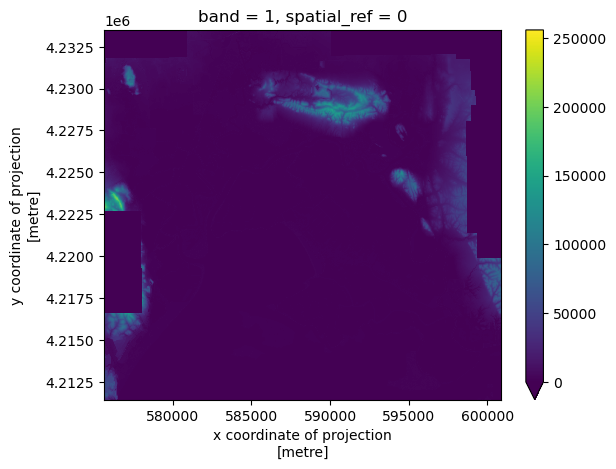

In [21]:
dem_std.plot(robust=True, vmin=0, vmax=np.max(dem))

In [21]:
dem.rio.to_raster('Rasters/dem_clip.tif')